# Problem 1: Null distributions of a one-sample vs two sample t

We've spent a lot of time discussing the "null distribution".
- The null hypothesis for a 1 sample t test is that the mean of the normal population our data comes from is equal to our hypothesized mean, $\mu$. Therefore, the null distribution is the distribution of t values we expect to observe if we randomly sample from a normal population that has a mean equal to our hypothesized mean, $\mu$.
- The null hypothesis for a 2 sample t test can be more nuanced, depending on the assumptions we make about each samples standard deviations. Here, we will consider the independent, equal sample size, equal variance two-sample t test.

## Confirm we can calculate t correctly

Let's start by firsting making sure we can calculate t correctly. For this problem, let's use the heights of players (in centimeters) randomly selected from the LA Lakers and Boston Celtics rosters:

Lakers = [200, 210, 220,225,215];

Heat = [190, 220, 193, 200, 190];

In the space below, calculate the 1 sample t value for the Lakers, assuming their average height is 195 cm, and the two-sample t value for this data. Confirm your answers using ttest_1samp and ttest_ind. Be sure to **note** the technicality discussion on the last slide of Lecture 11.

In [2]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

#arrays
l = [200, 210, 220, 225, 215]
h = [190, 220, 193, 200, 190]
lh = np.concatenate([l, h])

#direct t test
ttestl = stats.ttest_1samp(l,195)
ttestdirect = stats.ttest_ind(l, h, equal_var = False, alternative = 'two-sided')

#via linear regression
x = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
x = sm.add_constant(x)
model = sm.OLS(lh, x).fit()

#print t test
print("Via stats ttest we find:", ttestdirect, "for the Lakers only ttest:", ttestl, "and by linear regression we find:", model.summary())

Via stats ttest we find: Ttest_indResult(statistic=2.1679391976356874, pvalue=0.0644050922932436) for the Lakers only ttest: Ttest_1sampResult(statistic=4.4174102722651325, pvalue=0.011534048799787354) and by linear regression we find:                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     4.700
Date:                Tue, 04 Oct 2022   Prob (F-statistic):             0.0620
Time:                        15:31:37   Log-Likelihood:                -37.261
No. Observations:                  10   AIC:                             78.52
Df Residuals:                       8   BIC:                             79.13
Df Model:                           1                                         
Covariance Type:            nonrobust                

c:\Users\mdsnb\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Compare t distributions for 1 and 2 sample tests

- In the space below, write the code necessary to create null distributions for single and two-sample t tests when:
    - For the single sample t test, you are collecting 9 samples
    - For the two sample t test, you are collected 5 samples for each group.
- Produce density plots to compare the two distributions.
    - Be sure to select enough samples and to adjust bins sizes as needed so that the density plots are clear and stable (meaning each time you run it, you basically get the same answer).
    - Can use density feature of plt.hist or Seaborn's  sns function.
    - On the figure, clearly indicate the degrees of freedom for the specific t test
    - Unclear figures will not receive credit.


Text(0.5, 1.0, 'Two sample t test, dof = 8')

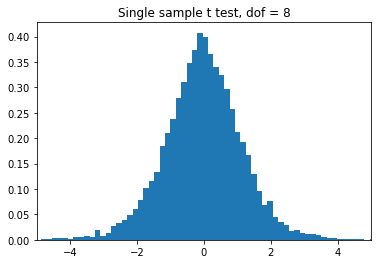

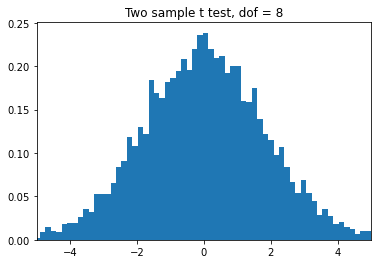

In [3]:
import matplotlib.pyplot as plt

#variables
mu = 10
sigma = 3
singlesamppop = 9
twosamppop = 5
singlet = []
twot = []
bins = 100

#for loop to produce samples and t values from those samples
for k in range(1,10000):

    #looped variables
    singlesamp = np.random.normal(mu, sigma, singlesamppop)
    twosamp1 = np.random.normal(mu, sigma, twosamppop)
    twosamp2 = np.random.normal(mu, sigma, twosamppop)
    
    #array creation for single sample t values
    singlet.append(((np.mean(singlesamp)-mu)/np.std(singlesamp, ddof = 1))*np.sqrt(singlesamppop))
    
    #array creation for two sample t values
    twosampstd = np.sqrt((np.std(twosamp1, ddof = 1)+np.std(twosamp2, ddof = 1))/2)
    twot.append((np.mean(twosamp1)-np.mean(twosamp2))/(twosampstd*np.sqrt(2/twosamppop)))

#plotting single sample t values histogram
plt.subplots()
plt.hist(singlet, density = True, bins = bins)
plt.xlim(-5, 5)
plt.title('Single sample t test, dof = 8')

#printing two sample t values histogram
plt.subplots()
plt.hist(twot, density = True, bins = bins)
plt.xlim(-5, 5)
plt.title('Two sample t test, dof = 8')

Based on your figure(s) above, how do the two distributions compare? **Comment here:**

## Compute p value for two-sample t test
- Using your null t distribution for your two sample t test, what is the likelihood that the heights of the Lakers and Heat come from populations with the same means?
- Check your answer using ttest_ind

In [4]:
#calculate the stdev of these two populations for a two sample t test
stdev = np.sqrt((np.std(l, ddof = 1)**2+np.std(h, ddof = 1)**2)/2)
lhtcount = len(lh)
lht = (np.mean(l)-np.mean(h))/(stdev*np.sqrt(2/lhtcount))
count = 0

#for loop to perform the t test as a proportion of a t distribution
for i in twot:
    if i > lht:
        count = count + 1
pvaluelh = 2*count/1000

print('Our p value is:',pvaluelh,'which means that we cannot say confidently that the two samples are from the same populations')

Our p value is: 0.988 which means that we cannot say confidently that the two samples are from the same populations


# Problem 2 Changing our data's distributions

As we've seen, we typically must assume that our data comes from a normal distribution. Let's use our brute force approach to determine how changing that assumption impacts our null t distributions.

- Below, create the null t distributions for a single-sample t test for n = 3, 8 and 30 when sampling from a normal distribution and a uniform distribution. 
- For each case, plot the density plots such that you can compare the distributions that result from sampling the normally and uniformally distributed data.
- Clearly label all figures.

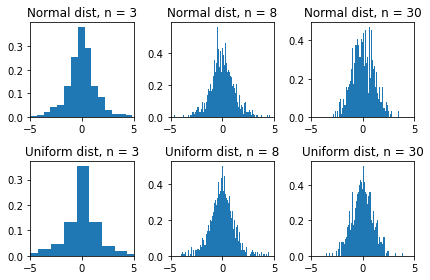

In [5]:
#variables and arrays
mu = 10
sigma = 3
t3 = []
t8 = []
t30 = []
u3 = []
u8 = []
u30 = []
bins = 100

#for loop to quickly make some t calculations
for k in range(1,1000):
    singlesamp3 = np.random.normal(mu, sigma, 3)
    singlesamp8 = np.random.normal(mu, sigma, 8)
    singlesamp30 = np.random.normal(mu, sigma, 30)
    uniform3 = np.random.uniform((mu-3*sigma),(mu+3*sigma), 3)
    uniform8 = np.random.uniform((mu-3*sigma),(mu+3*sigma), 8)
    uniform30 = np.random.uniform((mu-3*sigma),(mu+3*sigma), 30)
    t3.append(((np.mean(singlesamp3)-mu)/np.std(singlesamp3, ddof = 1))*np.sqrt(3))
    t8.append(((np.mean(singlesamp8)-mu)/np.std(singlesamp8, ddof = 1))*np.sqrt(8))
    t30.append(((np.mean(singlesamp30)-mu)/np.std(singlesamp30, ddof = 1))*np.sqrt(30))
    u3.append(((np.mean(uniform3)-mu)/np.std(uniform3, ddof = 1))*np.sqrt(3))
    u8.append(((np.mean(uniform8)-mu)/np.std(uniform8, ddof = 1))*np.sqrt(8))
    u30.append(((np.mean(uniform30)-mu)/np.std(uniform30, ddof = 1))*np.sqrt(30))

#plotting
plt.subplot(2,3,1)
plt.hist(t3, density = True, bins = bins)
plt.xlim(-5, 5)
plt.title('Normal dist, n = 3')

plt.subplot(2,3,2)
plt.hist(t8, density = True, bins = bins)
plt.xlim(-5, 5)
plt.title('Normal dist, n = 8')

plt.subplot(2,3,3)
plt.hist(t30, density = True, bins = bins)
plt.xlim(-5, 5)
plt.title('Normal dist, n = 30')

plt.subplot(2,3,4)
plt.hist(u3, density = True, bins = bins)
plt.xlim(-5, 5)
plt.title('Uniform dist, n = 3')

plt.subplot(2,3,5)
plt.hist(u8, density = True, bins = bins)
plt.xlim(-5, 5)
plt.title('Uniform dist, n = 8')

plt.subplot(2,3,6)
plt.hist(u30, density = True, bins = bins)
plt.xlim(-5, 5)
plt.title('Uniform dist, n = 30')

plt.tight_layout()

**Comment here** on how changing distributions from which our data is collected impacts the null t distribution.

Uniform vs normal distributions are very similar, and have subtle differences at low population sizes. Because uniform distributions are integers, they are more off from from normal distributions at the same population sizes. At higher populations they are more similar

# Problem 3 U statistic (i.e. no distribution assumptions)

One major concern is that we often know nothing about the data. We have no good reason to assume it is from a normal distribution. Instead, we have to use nonparametric statistical tools wherein we do not have to make any assumptions on whether our data comes from a specific population. One option is the U statistic from the Wilcoxon rank-sum test.

The assumption here is that two independent samples were selected from populations having the same distribution, but we don't know what that distribution is.

How to calculate U for small data sets (i.e. direct method)
- U is the number of “wins” between two competing datasets
- For each observation in one set, count the number of times this first value wins over any observations in the other set.
- Count 0.5 for any ties
- The sum of wins and ties is the U for that datasets
- To keep our discussion simple, we will ignore the case of ties

Here's a short example:
- Jason and Mr. N are competing. Jason scores a 100, 55, and 50. Mr. N scores a 90, 80, 60.
- Order the data by wins from highest to lowest and indicate who the score belongs to : J N N N J J
- We can calculate the U for Jason (call it U1) by adding the number of wins for each J entry. Namely, the first J beats N 3 times while the second and third J have no wins. So we get U1 = 3 + 0 + 0.
    - We can do the same calculation for Mr. N and get U2 = 2 + 2 + 2 = 6.
- Now, all we need to interpret these numbers is our absolute favorite thing: **a null distribution!!**

The null distribution for a U statistic is simply the score all of the **possible combinations of outcomes**. For example, if we only had two measurements for J and N, the possible combinations are:
   - JJBB (U1 = 4)
   - JBJB (U1 = 3)
   - JBBJ (U1 = 2)
   - BJBJ (U1 = 1)
   - BBJJ (U1 = 0)
   - BJJB (U1 = 2)

A histogram of the U1's above would be our null distribution. 

In the space below, wrote the code to construct the null distribution of U1 for when 5 samples are collected for each group. Hint: look for packages that can identify all combinations of two vectors...


Total combinations: 3628800
[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


(array([0.01587302, 0.        , 0.        , 0.        , 0.01587302,
        0.        , 0.        , 0.        , 0.03174603, 0.        ,
        0.        , 0.        , 0.04761905, 0.        , 0.        ,
        0.        , 0.07936508, 0.        , 0.        , 0.        ,
        0.11111111, 0.        , 0.        , 0.        , 0.14285714,
        0.        , 0.        , 0.        , 0.17460317, 0.        ,
        0.        , 0.        , 0.22222222, 0.        , 0.        ,
        0.        , 0.25396825, 0.        , 0.        , 0.        ,
        0.28571429, 0.        , 0.        , 0.        , 0.3015873 ,
        0.        , 0.        , 0.        , 0.31746032, 0.        ,
        0.        , 0.        , 0.31746032, 0.        , 0.        ,
        0.        , 0.3015873 , 0.        , 0.        , 0.        ,
        0.28571429, 0.        , 0.        , 0.        , 0.25396825,
        0.        , 0.        , 0.        , 0.22222222, 0.        ,
        0.        , 0.        , 0.17460317, 0.  

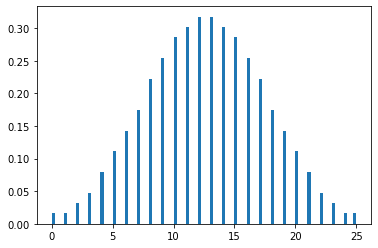

In [6]:
#lets import a way to make permutations
import itertools as it

#it takes usually 1.5-2.5 minutes to run btw

#scalars, vectors, and tensors
samplesize = 10
ab = (1, 1, 1, 1, 1, 0, 0, 0, 0, 0)
combs = it.permutations(ab, samplesize)
combmatrix = np.array([*combs])
totalcombs = len(combmatrix)
print('Total combinations:',totalcombs)
print(combmatrix)
winner=[]
wincount = 0

#for loop to look over combmatrix
for h in range (totalcombs):
    for i in range(samplesize):
        for j in range(i+1, samplesize):
            if combmatrix[h, j] > combmatrix[h, i]:
                wincount += 1
    winner.append(wincount)
    wincount = 0

#print(winner)
plt.hist(winner, density = True, bins = 100)

You collect two samples:

a = (7,1,2,8,10)
b = (4,5,6,9,11)

Use your distribution to estimate the likelihood (two-sided p value) that a and b come from the same distributions.


In [7]:
#making our arrays
a = [7, 1, 2, 8, 10]
b = [4, 5, 6, 9, 11]
ab = a + b
ab.sort(reverse = True)

#externally calculate score, faster than creating for loop
count = 0
score = 10

#for loop to compare to uniform t distribution (null distribution)
for i in winner:
    if i > score:
        count = count + 1

#calculating p value
pvalue = 2*count/totalcombs
print("our p value is:",pvalue,"which means we cannot say confidently that these two sets came from the same distribution")

our p value is: 1.3095238095238095 which means we cannot say confidently that these two sets came from the same distribution
